# <div align ="center"> Project 1 CPSMA 4413
## <div align ="center"> Collaborators: Aaron Arias Vales, Dustin Tidmore, Kennedy Thomas
### <div align ="center"> March 10th, 2023

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*The cell below contains the code for our approximation error calculations.*

In [ ]:
#true error
def terror(true, approx):
  error_t = true - approx
  return error_t

#relative true error 
def rterror(terror,tValue):
  RTerror = terror / tValue
  return RTerror

#approximate error
def approxError(current,previous):
  if previous == '':
    return 'None'
  else:
    Aerror = current - previous
    return Aerror
  
# relative approximate error
def relError(approxError, current):
    if current == 0:
      return 'None'
    else:
      RAError = approxError / current
      return RAError
  

*The following cell contains our approximations for $e^x$, as well as the true function for $e^x$.*

In [ ]:
#Taylor Series approximation for e^x
def approx_e(x,y):
  e_approximation = 0
  for i in range(y):
    e_approximation += x**i / math.factorial(i)
  return e_approximation

#actual value for e^x
def true_e(x):
  return math.exp(x)

**Now we begin to merge the two. The goal is to build a table that relates the error of our approximation to the true value of $e^x$ centered at a point of our choosing (here we chose 2). The table will also include error values at each approximation up to the first 25 iterations.**

In [ ]:
# returns the true value of e for every row; strictly for comparison
def tablevalue(x,n):
  for i in range(n):
    return math.exp(x)

In [ ]:
#Pandas dataframe storing values from functions listed above and error between approximations up to 20 iterations

df = pd.DataFrame(columns = ['Expansion','e^x approx','e^x value','True Error','Relative True Error','Approximate Error','Relative Approximate Error'])
df.astype('int32').dtypes
for i in range(1,21):
  df = df.append({'Expansion': i,
                  'e^x approx': approx_e(2,i),
                  'e^x value': tablevalue(2,i),
                  'True Error': terror(true_e(2),approx_e(2,i)),
                  'Relative True Error': rterror(terror(true_e(2),approx_e(2,i)),true_e(2)),
                  'Approximate Error':approxError(approx_e(2,i),approx_e(2,i-1)),
                  'Relative Approximate Error':relError(approxError(approx_e(2,i),approx_e(2,i-1)),approx_e(2,i))}, ignore_index=True)


#deleting top entry as it is not relevant
df.drop(index = 0)
df

,Expansion,e^x approx,e^x value,True Error,Relative True Error,Approximate Error,Relative Approximate Error
0,1.0,1.000000,7.389056,6.389056e+00,8.646647e-01,1.000000e+00,1.000000e+00
1,2.0,3.000000,7.389056,4.389056e+00,5.939942e-01,2.000000e+00,6.666667e-01
2,3.0,5.000000,7.389056,2.389056e+00,3.233236e-01,2.000000e+00,4.000000e-01
3,4.0,6.333333,7.389056,1.055723e+00,1.428765e-01,1.333333e+00,2.105263e-01
4,5.0,7.000000,7.389056,3.890561e-01,5.265302e-02,6.666667e-01,9.523810e-02
5,6.0,7.266667,7.389056,1.223894e-01,1.656361e-02,2.666667e-01,3.669725e-02
6,7.0,7.355556,7.389056,3.350054e-02,4.533806e-03,8.888889e-02,1.208459e-02
7,8.0,7.380952,7.389056,8.103718e-03,1.096719e-03,2.539683e-02,3.440860e-03
8,9.0,7.387302,7.389056,1.754512e-03,2.374473e-04,6.349206e-03,8.594757e-04
9,10.0,7.388713,7.389056,3.435769e-04,4.649808e-05,1.410935e-03,1.909581e-04


*Now that we have our table generated, we can begin making some visualizations of our data.*

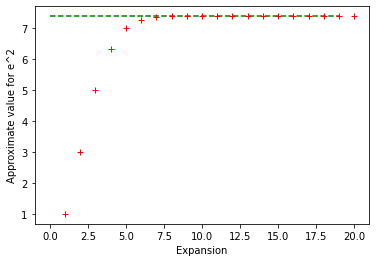

In [ ]:
#setting the Expansion and e^x approx / e^2 value columns in a NumPy array.

df_array_expan = df[['Expansion']].to_numpy()
df_array_approximation = df[['e^x approx']].to_numpy()
df_array_true = df[['e^x value']].to_numpy()

#plotting the approximations and true value at each expansion of the series. 

%matplotlib inline
#line for true value of e^x when x=2 shown on dashed green line
plt.plot(df_array_true, 'g', linestyle = 'dashed')
plt.xlabel('Expansion')
plt.ylabel('Approximate value for e^2')
plt.plot(df_array_expan,df_array_approximation,'r+')
plt.show()

**The graph above plots our approximations for $e^2$ at each expansion of the Taylor Series, {insert taylor series LaTeX here}. The dotted green line represents the true value of $e^2$.**

*Next, we will graph the function $e^x$ and the 5th order Taylor Series approximation.*

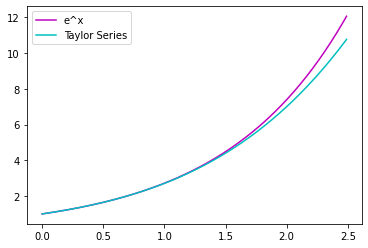

In [ ]:
%matplotlib inline
x = np.arange(0,2.5,.01)
plt.plot(x,np.exp(x),'m',label='e^x')
plt.plot(x,approx_e(x,5),'c',label='Taylor Series')
plt.legend(['e^x','Taylor Series'])
plt.show()

*Above we have graphed the Taylor Series Approximation to the 5th degree alongside the graph of $e^x$. The graph has been zoomed in to highlight where the functions begin to diverge from one another.*

## 3 ##
 Lets take a gander at the given meme it's broadly giving the eqation √(X² + Y²)≈0.96(X) + 0.4(Y). Firstly the first given equation √(X² + Y²) is the hypotenuse for a right angled triangle. While 0.96(X) + 0.4(Y) is a weighted sum.  So let's work out each equation given 10 of the same values

In [ ]:
# Define the functions
def hypotenuse(x, y):
    return math.sqrt(x ** 2 + y ** 2)

def weighted_Sum(x, y):
    return 0.96 * x + 0.4 * y

def hypotenuse(x, y):
    return math.sqrt(x ** 2 + y ** 2)

def weighted_Sum(x, y):
    return 0.96 * x + 0.4 * y

def terror(exact, approx):
    return abs(exact - approx)

def rterror(terror, exact):
    if exact == 0:
        return 0
    else:
        return terror / exact

def approxError(curr, prev):
    return abs(curr - prev)

def relError(approx_error, curr):
    if curr == 0:
        return 0
    else:
        return approx_error / curr

# Test values
values = [(0, 0), (1, -1), (40235, 1987), (7, 24), (45,-45 ), (10, 10), (-3, 4), (3, -4), (12.5, 13.5), (-256.5, 375.5)]

# Create dataframe
df = pd.DataFrame(columns=['x', 'y', 'hypotenuse', 'weighted_sum', 'true_error', 'relative_true_error', 'approximate_error', 'relative_approximate_error'])

# Fill dataframe
for x, y in values:
    approx_hyp = hypotenuse(x, y)
    approx_weighted_sum = weighted_Sum(x, y)
    true_hyp = math.sqrt(x ** 2 + y ** 2)
    true_weighted_sum = 0.96 * x + 0.4 * y
    df = df.append({'x': x,
                    'y': y,
                    'hypotenuse': approx_hyp,
                    'weighted_sum': approx_weighted_sum,
                    'true_error': terror(true_hyp, approx_hyp),
                    'relative_true_error': rterror(terror(true_hyp, approx_hyp), true_hyp),
                    'approximate_error': approxError(approx_hyp, df.loc[df.index[-1], 'hypotenuse']) if len(df) > 0 else 0,
                    'relative_approximate_error': relError(approxError(approx_hyp, df.loc[df.index[-1], 'hypotenuse']) if len(df) > 0 else 0, approx_hyp) if len(df) > 0 else 0},
                   ignore_index=True)

# Print dataframe
print(df)




         x       y    hypotenuse  weighted_sum  true_error  \
0      0.0     0.0      0.000000          0.00         0.0   
1      1.0    -1.0      1.414214          0.56         0.0   
2  40235.0  1987.0  40284.033984      39420.40         0.0   
3      7.0    24.0     25.000000         16.32         0.0   
4     45.0   -45.0     63.639610         25.20         0.0   
5     10.0    10.0     14.142136         13.60         0.0   
6     -3.0     4.0      5.000000         -1.28         0.0   
7      3.0    -4.0      5.000000          1.28         0.0   
8     12.5    13.5     18.398369         17.40         0.0   
9   -256.5   375.5    454.744434        -96.04         0.0   

   relative_true_error  approximate_error  relative_approximate_error  
0                  0.0           0.000000                    0.000000  
1                  0.0           1.414214                    1.000000  
2                  0.0       40282.619770                    0.999965  
3                  0.0       

We can see for this instance are the numbers close? Sure but I've always been told that almost only counts in horse shoes and hand grenades.  The approximations aren't that great the longer it's comparitive function grows in length.  If we are to use an approximation as such works to get us in a general area if we are allowed a margine of error. Practical applications of such can be used in finanical planning, attempting to locate a missing or abducted person using a cellphone "ping" where a generalized area is acceptible.  Looking at this meme I can relate to the level of work using  approixmate versus exact calculations.  Using the approximate is a quick tie you over if you need it in a pinch versus taking the time and ability of long form. I agree to the level of brain use.  

## 4 ##
**Findings**


As seen in the above tables, the more iterations done for these approximations, the smaller each error calculation gets as the approximation approaches the real value of e^x. This is the importance of running several iterations, or "going to the 20th degree." By going as far as these tables did, they ended at a value that, to human eyes, is indistinguishable from the true value.

However, that is sometimes not precise enough. The necessary accuracy of the approximation is entirely dependant on what the approximation is for. Horseshoes and handgrenades were mentioned above, which are both things that work on a low level of accuracy, but things like calculations for construction or aviation require precision, or resources are wasted and lives are lost.

Personally, I can't tell the difference between iteration 8 and anything beyond it. I probably wouldn't know that they were different values at a glance.